## Time to get you hands dirty!  Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma=0.2$.

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above


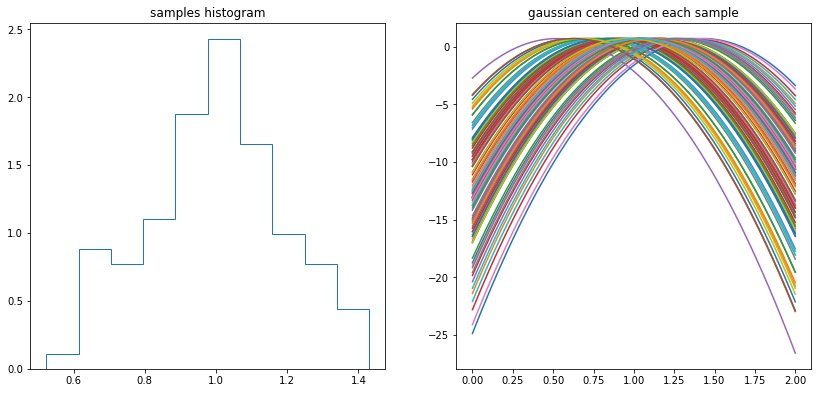

In [37]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats

Nsamples = 100

mean = 1
sigma = 0.2

samples = np.random.normal (mean, sigma, Nsamples)

fig = plt.figure(figsize=(14, 14))

ax=fig.add_subplot(221)
ax.hist(samples, int(np.sqrt(Nsamples)), density = True, histtype = 'step')
ax.set_title('samples histogram')

ax = fig.add_subplot(222)
x = np.linspace(0, 2, Nsamples)

log_llh = 0
for i in range(Nsamples): 
    llh_i = scipy.stats.norm(samples[i], sigma) #llh of each value, defined as a Gaussian centered on the value itself
    ax.set_title('gaussian centered on each sample')
    ax.plot(x, np.log(llh_i.pdf(x)))
    log_llh = log_llh - ((x - samples[i])**2) / (2*sigma)**2 #building the log of the total llh

1.0101010101010102


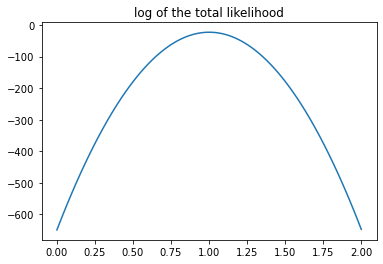

In [43]:
plt.plot(x, log_llh)
plt.title('log of the total likelihood')

x_max = x[np.argmax(log_llh)] #the x value at which the log llh is maximised
print(x_max)

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case